In [1]:
# Imports:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import dxchange
import nibabel as nib
import tifffile
from skimage.filters import threshold_otsu
os.chdir('/dtu/3d-imaging-center/courses/02509/groups/members/s194333/HPC3D_project')

astropy module not found


In [2]:
folder_path = '/dtu/3d-imaging-center/courses/02509/groups/group01/Lava_data/Island_ny/'
file_name = 'lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon.txm'
absolute_path = os.path.join(folder_path, file_name)
all_data = dxchange.reader.read_txm(absolute_path)

In [3]:
print(all_data[1].keys())
data = all_data[0]
pixel_size = all_data[1]['pixel_size']
print(pixel_size)
img_shape = data.shape
print(img_shape)
img_shape_array = np.array(img_shape)
total_size = img_shape_array * pixel_size
total_size__mm = total_size/1000
print(total_size__mm)
pixel_size_mm = pixel_size/1000
pixels_per_mm = 1/pixel_size_mm
print(pixels_per_mm)

dict_keys(['facility', 'image_width', 'image_height', 'data_type', 'number_of_images', 'pixel_size', 'reference_filename', 'reference_data_type', 'thetas', 'x_positions', 'y_positions', 'z_positions', 'x-shifts', 'y-shifts', 'reference'])
21.822635650634766
(1018, 1024, 1004)
[22.21544309 22.34637891 21.90992619]
45.823979101759534


In [ ]:
folder_path = '/dtu/3d-imaging-center/courses/02509/groups/members/s194333/HPC3D_project/results'
file_name = 'bin_data.tiff'
absolute_path = os.path.join(folder_path, file_name)
bin_data = tifffile.imread(absolute_path)

file_name = 'mask.tiff'
absolute_path = os.path.join(folder_path, file_name)
mask = tifffile.imread(absolute_path)

In [4]:
# crop 5mm times 5mm times 5mm
crop_size = int(5*pixels_per_mm)
print(crop_size)

229


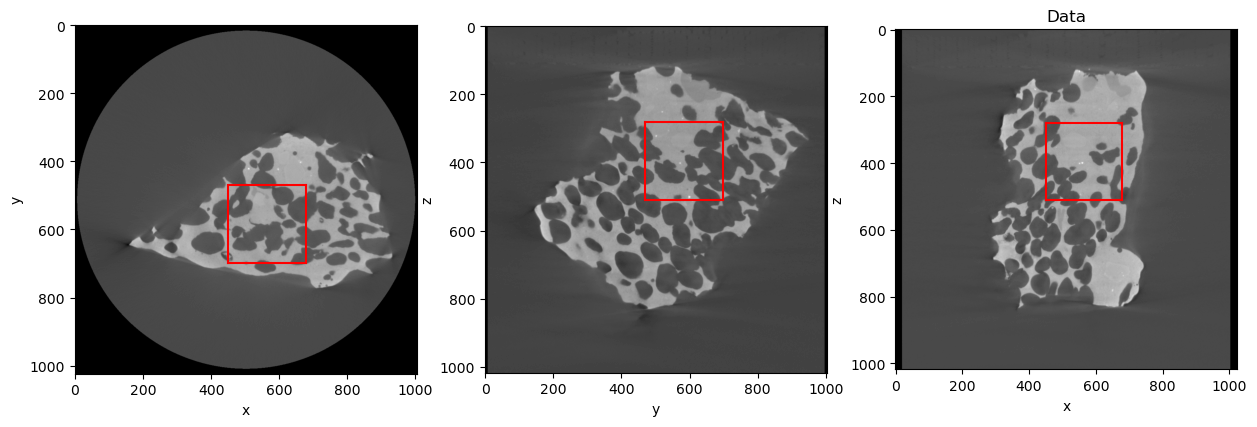

In [5]:
# visualize the data
start_x = 450#440
end_x = start_x + crop_size
start_y = 470#420
end_y = start_y + crop_size
start_z = 280#280
end_z = start_z + crop_size
slice = 100# crop_size
slice_x = start_x + slice
slice_y = start_y + slice
slice_z = start_z + slice
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data[slice_z, :, :], cmap='gray')
# visualize the crop box
ax[0].plot([start_x, end_x], [start_y, start_y], 'r')
ax[0].plot([start_x, end_x], [end_y, end_y], 'r')
ax[0].plot([start_x, start_x], [start_y, end_y], 'r')
ax[0].plot([end_x, end_x], [start_y, end_y], 'r')
# ad axes labels
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].imshow(data[:,slice_x, :], cmap='gray')
ax[1].plot([start_y, end_y], [start_z, start_z], 'r')
ax[1].plot([start_y, end_y], [end_z, end_z], 'r')
ax[1].plot([start_y, start_y], [start_z, end_z], 'r')
ax[1].plot([end_y, end_y], [start_z, end_z], 'r')
ax[1].set_xlabel('y')
ax[1].set_ylabel('z')
ax[2].imshow(data[:, :, slice_y], cmap='gray')
ax[2].plot([start_x, end_x], [start_z, start_z], 'r')
ax[2].plot([start_x, end_x], [end_z, end_z], 'r')
ax[2].plot([start_x, start_x], [start_z, end_z], 'r')
ax[2].plot([end_x, end_x], [start_z, end_z], 'r')
ax[2].set_xlabel('x')
ax[2].set_ylabel('z')
plt.title('Data')
plt.show()